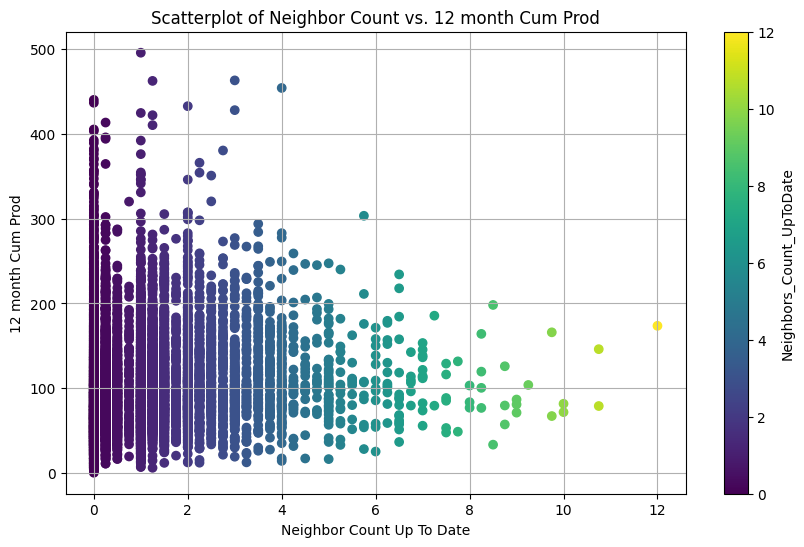

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

data = pd.read_csv('UT_Comp_With_Neighbor_Wells_1000_Formation_Weighted_Count.csv')

# Create the scatter plot with color mapping
plt.figure(figsize=(10, 6))
plt.scatter(data['Neighbors_Count_UpToDate'], data['12 month Cum Prod'], c=data['Neighbors_Count_UpToDate'], cmap='viridis')
plt.colorbar(label='Neighbors_Count_UpToDate')  # Corrected colorbar label
plt.xlabel('Neighbor Count Up To Date')
plt.ylabel('12 month Cum Prod')
plt.title('Scatterplot of Neighbor Count vs. 12 month Cum Prod')
plt.grid(True)


In [1]:
!pip install catboost shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


Operator                 0
Well Name                0
Formation                8
Lateral Length           8
Stages                 168
Township                 0
Range                    0
Section                  0
Total Prop, lbs          0
Fluid, bbls             17
Date Fracd               8
Compl. Type             90
Latitude                 0
Longitude                0
Fluid Type from DI    5776
SPACING_CAPPED           9
12 month Cum Prod        0
Best1 Mo BOPD         1550
Best3 Mo BOPD         1656
Best6 Mo BOPD         2043
Best9 Mo BOPD         2464
Best12 Mo BOPD        2973
dtype: int64


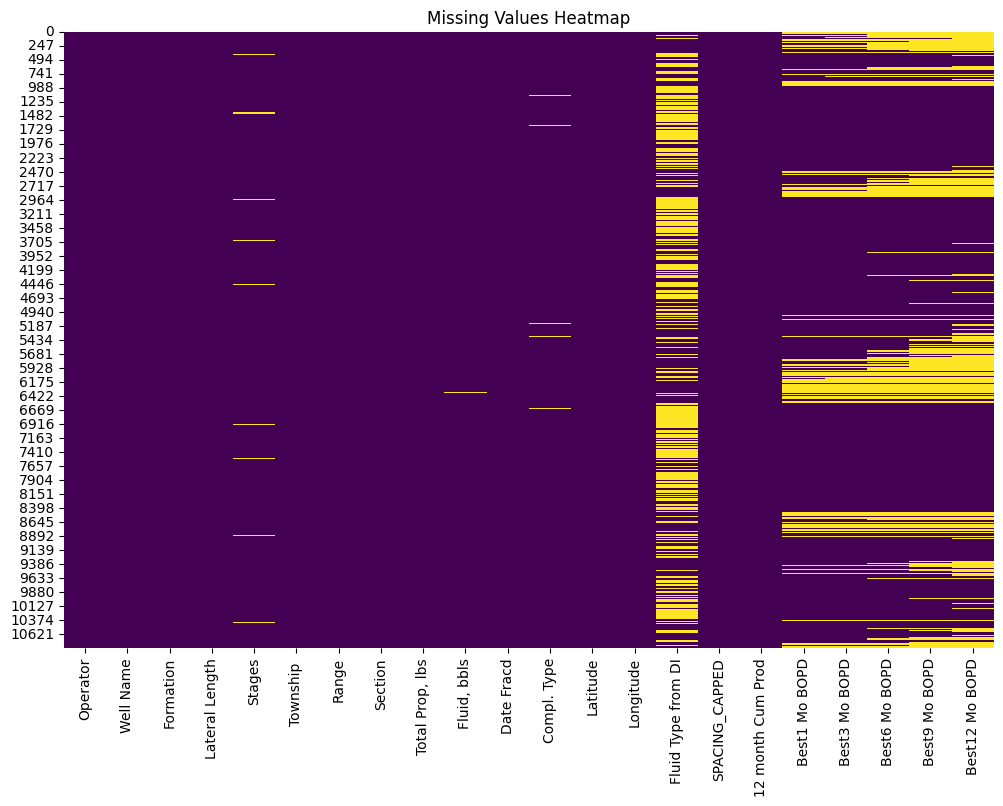

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
date_data = pd.read_csv('UT Comp_Seq.csv')

# Check for missing values
missing_values = date_data.isnull().sum()
print(missing_values)


# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(date_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

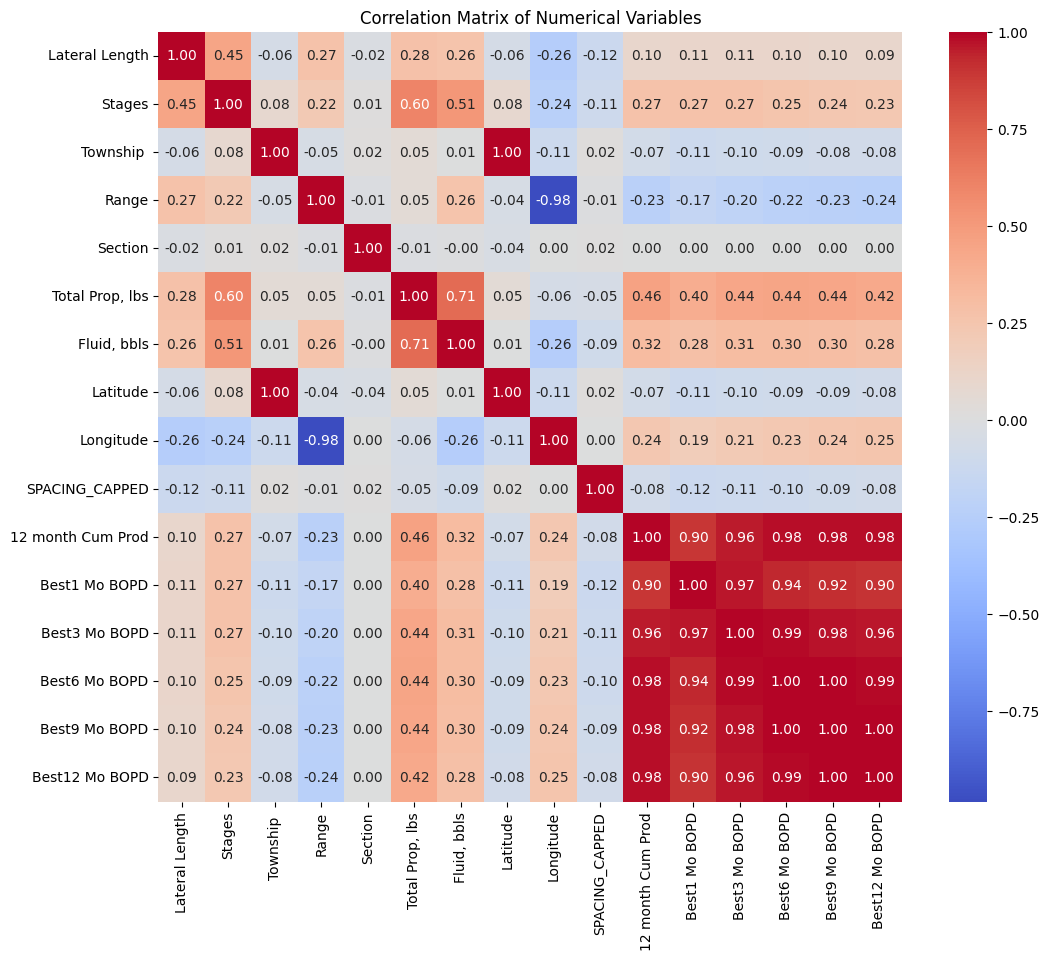

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data

# Select relevant numerical columns for correlation analysis
numerical_cols = date_data.select_dtypes(include=['number']).columns

# Drop rows with any NaN values in the selected columns
date_data_numeric = date_data[numerical_cols].dropna()


# Calculate the correlation matrix
correlation_matrix = date_data_numeric.corr()


# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


<ipython-input-6-5cd7ae68ea6b>:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for colorbar


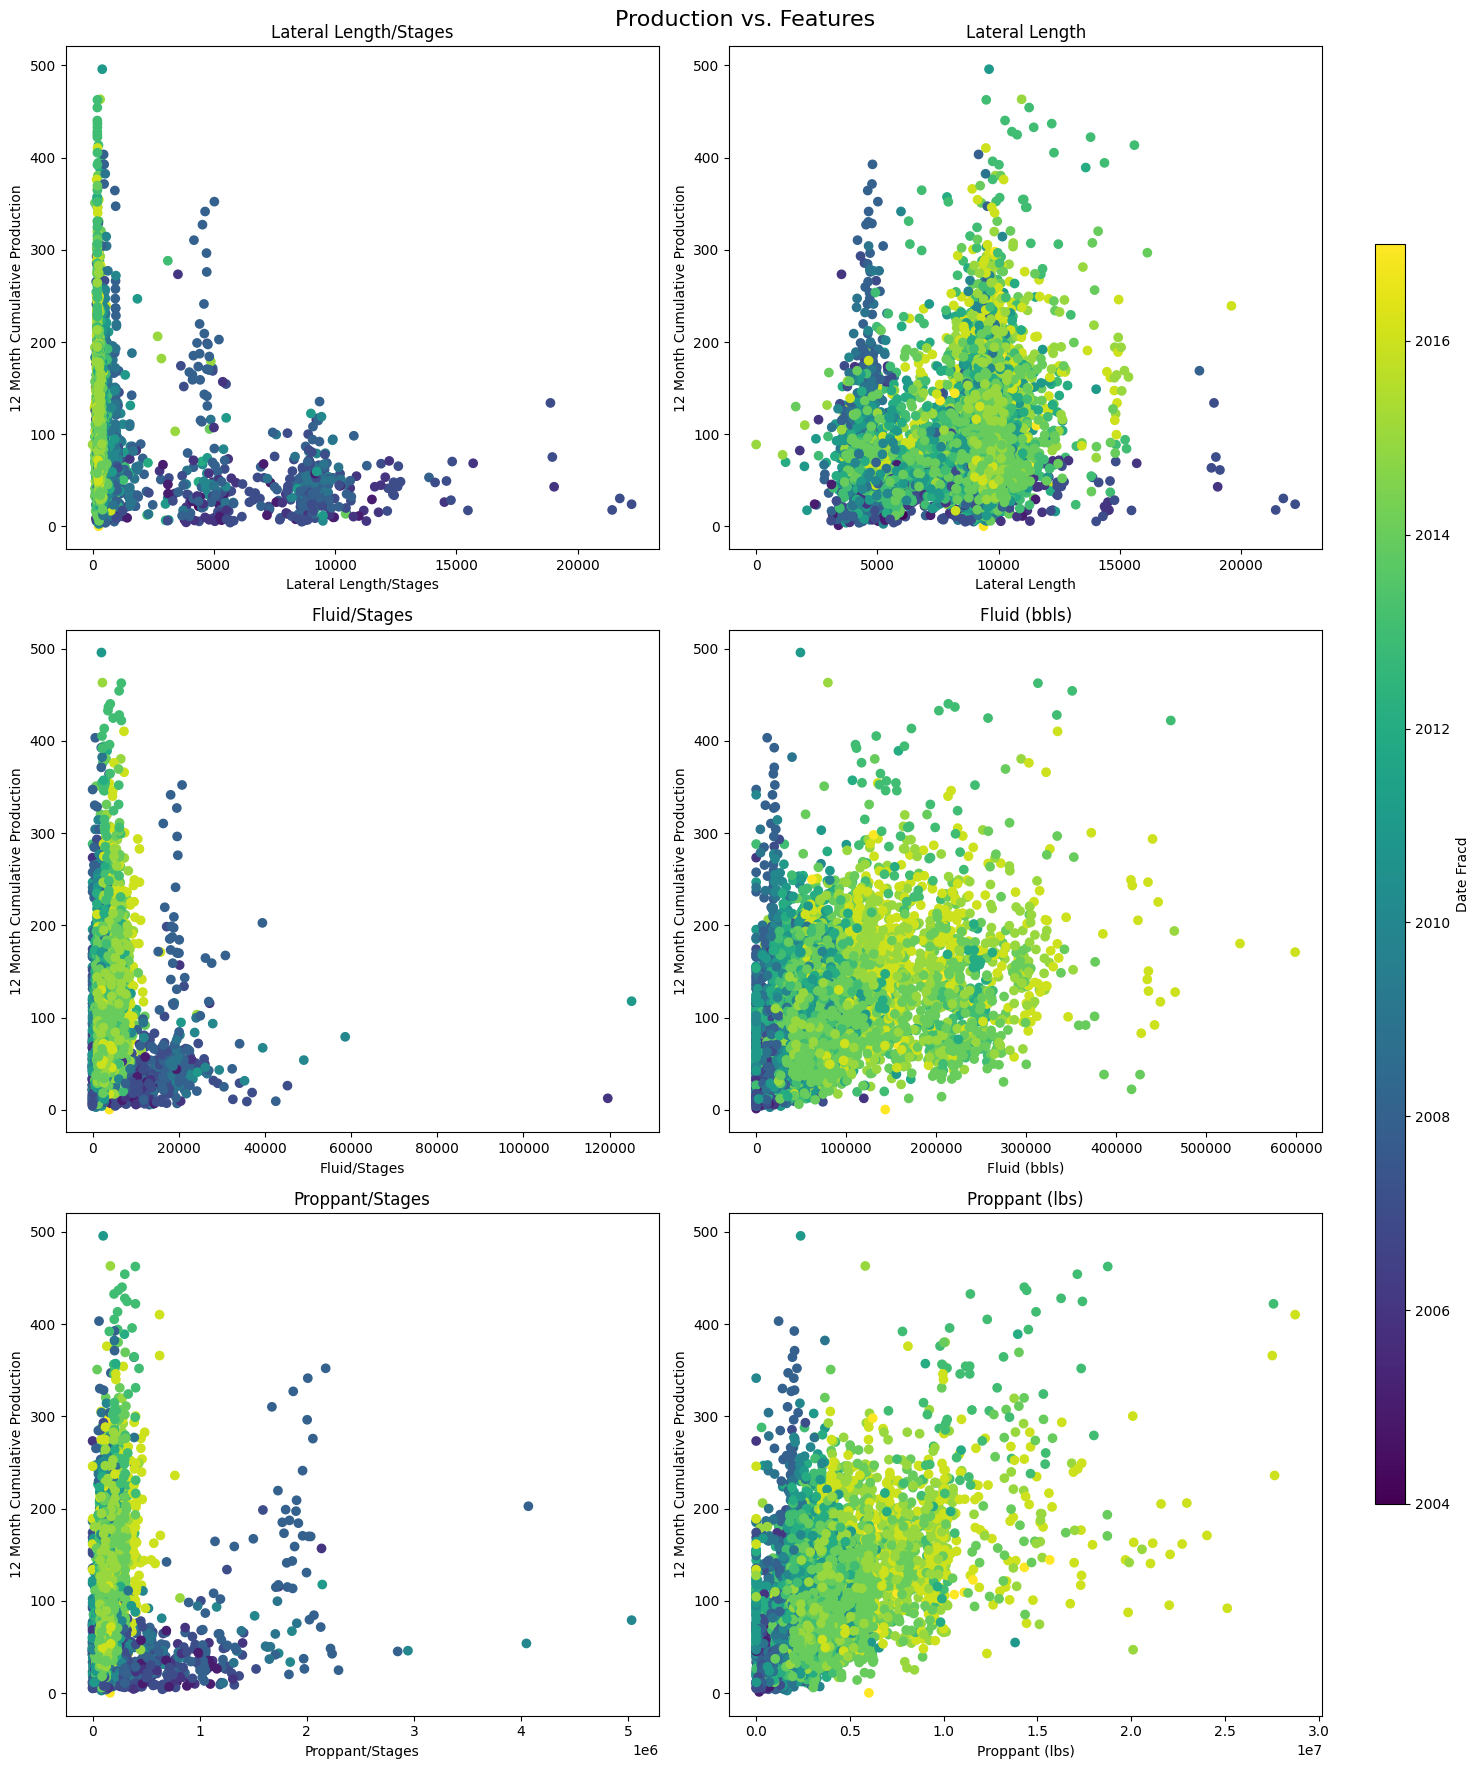

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('UT Comp_Seq.csv')

# Create new columns
data['Lateral Length/Stages'] = data['Lateral Length'] / data['Stages']
data['Proppant/Stages'] = data['Total Prop, lbs'] / data['Stages']
data['Fluid/Stages'] = data['Fluid, bbls'] / data['Stages']

# Convert 'Date Fracd' to numeric for color mapping
data['Date Fracd'] = pd.to_numeric(data['Date Fracd'].str[-4:], errors='coerce')

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Production vs. Features', fontsize=16)


# Subplot 1: Lateral Length/Stages vs. Production
im1 = axes[0, 0].scatter(data['Lateral Length/Stages'], data['12 month Cum Prod'], c=data['Date Fracd'], cmap='viridis')
axes[0, 0].set_xlabel('Lateral Length/Stages')
axes[0, 0].set_ylabel('12 Month Cumulative Production')
axes[0, 0].set_title('Lateral Length/Stages')

im2 = axes[0, 1].scatter(data['Lateral Length'], data['12 month Cum Prod'], c=data['Date Fracd'], cmap='viridis')
axes[0, 1].set_xlabel('Lateral Length')
axes[0, 1].set_ylabel('12 Month Cumulative Production')
axes[0, 1].set_title('Lateral Length')

# Subplot 2: Fluid/Stages vs. Production
im3 = axes[1, 0].scatter(data['Fluid/Stages'], data['12 month Cum Prod'], c=data['Date Fracd'], cmap='viridis')
axes[1, 0].set_xlabel('Fluid/Stages')
axes[1, 0].set_ylabel('12 Month Cumulative Production')
axes[1, 0].set_title('Fluid/Stages')

im4 = axes[1, 1].scatter(data['Fluid, bbls'], data['12 month Cum Prod'], c=data['Date Fracd'], cmap='viridis')
axes[1, 1].set_xlabel('Fluid (bbls)')
axes[1, 1].set_ylabel('12 Month Cumulative Production')
axes[1, 1].set_title('Fluid (bbls)')

# Subplot 3: Proppant/Stages vs. Production
im5 = axes[2, 0].scatter(data['Proppant/Stages'], data['12 month Cum Prod'], c=data['Date Fracd'], cmap='viridis')
axes[2, 0].set_xlabel('Proppant/Stages')
axes[2, 0].set_ylabel('12 Month Cumulative Production')
axes[2, 0].set_title('Proppant/Stages')

im6 = axes[2, 1].scatter(data['Total Prop, lbs'], data['12 month Cum Prod'], c=data['Date Fracd'], cmap='viridis')
axes[2, 1].set_xlabel('Proppant (lbs)')
axes[2, 1].set_ylabel('12 Month Cumulative Production')
axes[2, 1].set_title('Proppant (lbs)')


# Add colorbar (using the first image for the colorbar)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im1, cax=cbar_ax, label='Date Fracd')

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for colorbar
plt.show()


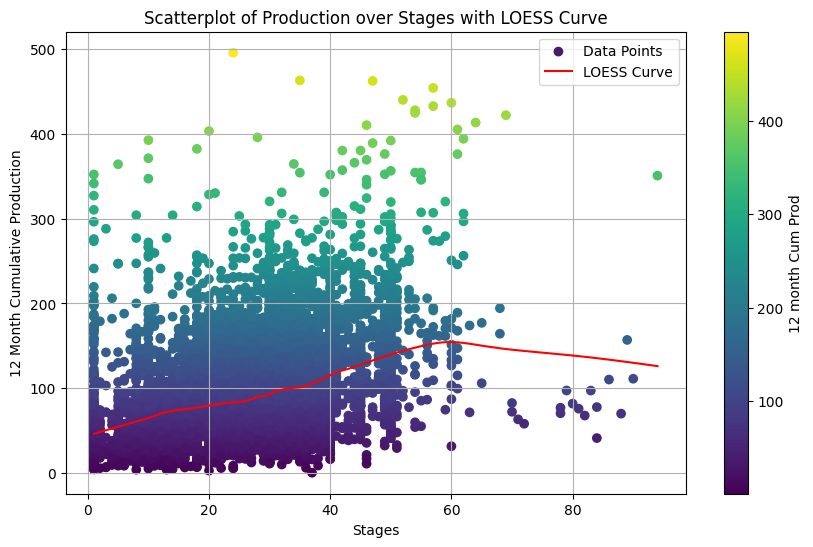

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming 'data' DataFrame is already loaded as in the provided code

# Select relevant columns
x = data['Stages']
y = data['12 month Cum Prod']

# Calculate LOESS
lowess = sm.nonparametric.lowess(y, x, frac=0.3) # Adjust frac for smoothness

# Create the scatter plot with LOESS curve and color mapping
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, cmap='viridis', label='Data Points')  # Color by production
plt.plot(lowess[:, 0], lowess[:, 1], color='red', label='LOESS Curve')
plt.xlabel('Stages')
plt.ylabel('12 Month Cumulative Production')
plt.title('Scatterplot of Production over Stages with LOESS Curve')
plt.colorbar(label='12 month Cum Prod')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error
from catboost import CatBoostRegressor
import numpy as np


data1 = pd.read_csv('UT_Comp_With_Neighbor_Wells_1000_Formation_Weighted_Count.csv')

data1['X (feet)'] = data1['X (feet)'] - data1['X (feet)'].min()
data1['Y (feet)'] = data1['Y (feet)'] - data1['Y (feet)'].min()

data1['Lateral Length/Stages'] = data1['Lateral Length']/data1['Stages']
#data1['Fluid/Stages'] = data1['Fluid, bbls']/data1['Stages']
data1['Proppant/Stages'] = data1['Total Prop, lbs']/data1['Stages']


#Drop Features
data1 = data1.drop(columns=['Fluid Type from DI', 'Well Name', 'Best1 Mo BOPD', 'Best9 Mo BOPD' ,'Best3 Mo BOPD',\
                            'Best6 Mo BOPD', 'Best12 Mo BOPD', 'Range', 'Township ', \
                            'SPACING_CAPPED', 'Lateral Length', 'Section', 'Unnamed: 0'])
data1 = data1.dropna()
print(data1.columns)

#Turn Date Fracd into Year Fracd
data1['Date Fracd'] = data1['Date Fracd'].str[-4:]
data1['Date Fracd'] = pd.to_numeric(data1['Date Fracd'])

# Get a list of categorical columns
categorical_cols = data1.select_dtypes(include=['object']).columns.tolist()
# Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    data1[col] = label_encoder.fit_transform(data1[col])
num_cols = data1.shape[1]

# Prepare the data
X = data1.drop(columns=['12 month Cum Prod'])
y = data1['12 month Cum Prod']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#best model training
best_param = {'learning_rate': 0.22, 'l2_leaf_reg': 7, 'iterations': 450, 'depth': 9, 'border_count': 270}
catboost_model = CatBoostRegressor(loss_function='RMSE', random_seed=42, **best_param, silent = True)

catboost_model.fit(X_train, y_train)


# Make predictions and evaluate the model
y_pred = catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")

Index(['Operator', 'Formation', 'Stages', 'Total Prop, lbs', 'Fluid, bbls',
       'Date Fracd', 'Compl. Type', 'Latitude', 'Longitude',
       '12 month Cum Prod', 'X (feet)', 'Y (feet)', 'Neighbors_Count_UpToDate',
       'Lateral Length/Stages', 'Proppant/Stages'],
      dtype='object')
Mean Squared Error: 707.7373699354955
R-squared: 0.7553474816870405
MAPE: 0.27027491929291014


R-squared: 0.7553474816870405


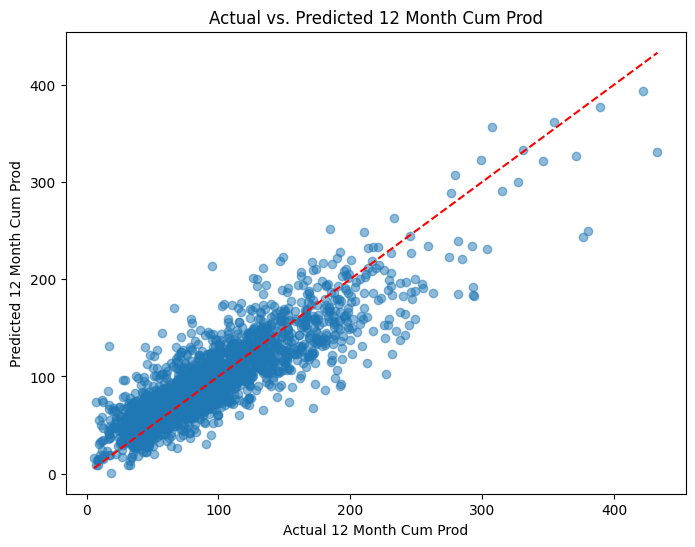

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are already defined from the previous code

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual 12 Month Cum Prod")
plt.ylabel("Predicted 12 Month Cum Prod")
plt.title("Actual vs. Predicted 12 Month Cum Prod")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.show()


                     Feature  Importance
7                   Latitude   13.799812
9                   X (feet)   13.234836
10                  Y (feet)   13.107547
8                  Longitude   12.186176
3            Total Prop, lbs    9.784685
4                Fluid, bbls    8.106752
5                 Date Fracd    6.594958
1                  Formation    4.686169
0                   Operator    4.313605
2                     Stages    4.189978
12     Lateral Length/Stages    3.316814
13           Proppant/Stages    2.904435
11  Neighbors_Count_UpToDate    2.317742
6                Compl. Type    1.456490


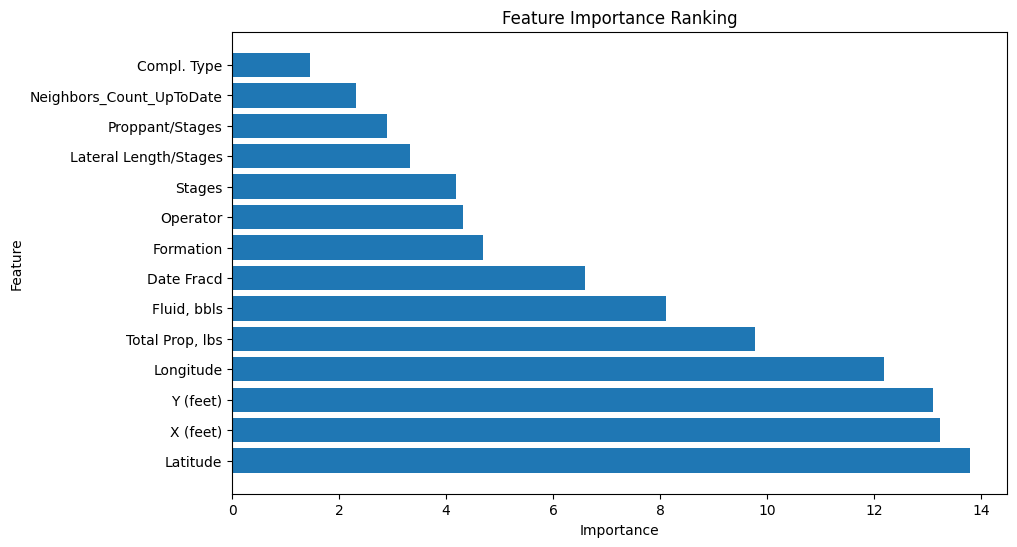

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
importances = catboost_model.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Ranking")
plt.show()


In [6]:

import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# ... (your data loading and preprocessing code remains the same) ...

# Assuming 'data1' is your preprocessed DataFrame
X = data1.drop(columns=['12 month Cum Prod'])
y = data1['12 month Cum Prod']

# ... (your CatBoost model training code remains the same) ...

# Assuming 'catboost_model' is your trained CatBoostRegressor

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(catboost_model)

# Calculate SHAP values for the entire dataset (X)
shap_values = explainer.shap_values(X)

# Create a DataFrame with SHAP values
shap_values_df = pd.DataFrame(shap_values, columns=[f'SHAP_{col}' for col in X.columns])

# Concatenate SHAP values with original data
shap_data = pd.concat([X, shap_values_df], axis=1)

# Save to CSV
shap_data.to_csv('shap_output.csv', index=False)

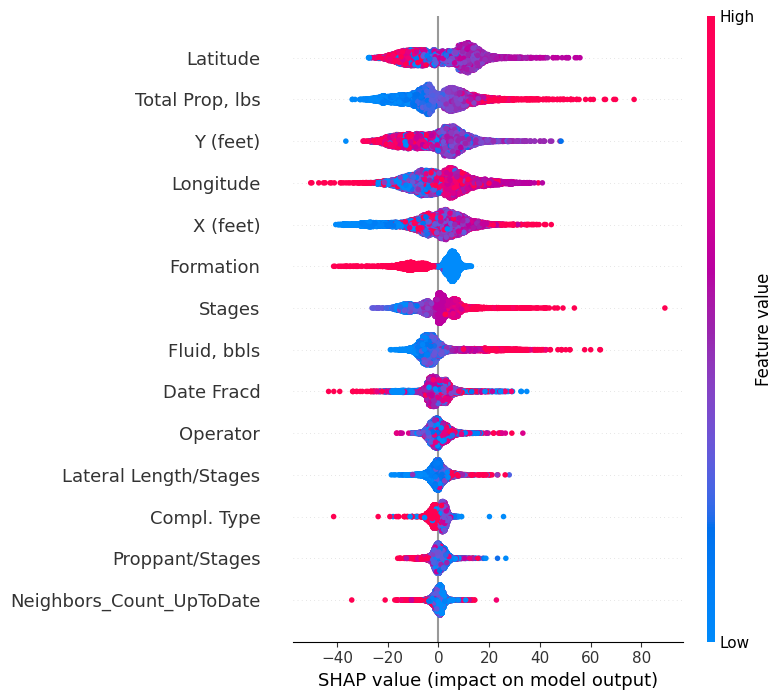

In [9]:
# Create a summary plot
shap.summary_plot(shap_values, X)

# Create a force plot for a specific instance (e.g., the first instance in the test set)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

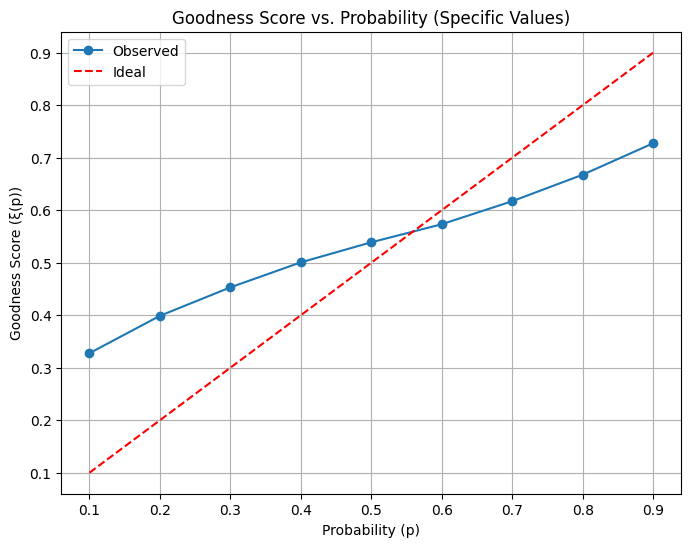

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pred_intervals = pd.read_csv('prediction_intervals.csv')

# Get all realization columns
realization_cols = [col for col in pred_intervals.columns if 'Realization' in col]

# Define specific probability values
prob_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate empirical CDF (ECDF) for each data point's realizations
ecdfs = []
for index in pred_intervals.index:
    row = pred_intervals.loc[index, realization_cols]
    ecdfs.append(np.sort(row))
ecdfs = pd.DataFrame(ecdfs, index=pred_intervals.index)

# Calculate goodness scores for specific probability values
goodness_scores = []
for prob in prob_values:
    scores_for_prob = []
    for index in pred_intervals.index:
        actual_value = pred_intervals.loc[index, 'Actual Value']
        realizations = ecdfs.loc[index].values

        # Find realizations corresponding to the specified probability
        realization_index = int(prob * len(realizations)) -1 #adjust index to 0-based
        if realization_index < 0:
          realization_index = 0 #handle the case when probability is 0.1

        realization_at_prob = realizations[realization_index]

        # Check if actual value is less than or equal to the realization
        is_less_or_equal = actual_value <= realization_at_prob

        # Append 1 if true, 0 otherwise to scores_for_prob
        scores_for_prob.append(int(is_less_or_equal))

    # Calculate goodness score (proportion of True values)
    goodness_score = np.sum(scores_for_prob) / len(scores_for_prob)
    goodness_scores.append(goodness_score)

# Create the goodness-of-fit plot
plt.figure(figsize=(8, 6))
plt.plot(prob_values, goodness_scores, marker='o', linestyle='-', label='Observed')
plt.plot(prob_values, prob_values, linestyle='--', color='red', label='Ideal')

# Customize the plot
plt.xlabel('Probability (p)')
plt.ylabel('Goodness Score (ξ(p))')
plt.title('Goodness Score vs. Probability (Specific Values)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()